# Proyek Analisis Data: Brazilian E-Commerce Public Dataset by Olist
- Nama: Aprilia Wulandari
- Email: jkriliaaa97@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

**3 PERTANYAAN BISNIS**

1. Sepanjang sejarah penjualan dari tahun 2016-2018, apa saja produk terlaris di pasar e-commerce Brazil?
2. Dari sekian banyaknya pesanan pastinya metode pembayaran antara satu sama lain berbeda, bagaimana pengaruh metode pembayaran terhadap jumlah pesanan?
3. Banyak lokasi pasar yang menjadi target dari penjualan setiap tahunnya, lalu bagaimana pengaruh lokasi pasar terhadap jumlah pesanan?


## Menyiapkan semua library yang dibutuhkan

In [162]:
# menyiapkan semua library yang digunakan

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling


### Gathering Data
- Pada tahap ini, kita akan mengumpulkan semua data yang dibutuhkan.
- Pada praktik yang umum dijumpai di industri, seluruh data tersebut diperoleh dari proses query database. Proses query ini umumnya dijalankan menggunakan perintah SQL.

In [163]:
# memuat tabel produk
df_produk = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/AnalisisData/main/olist_products_dataset.csv')
df_produk.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [164]:
# memuat tabel pesanan item
df_order_item = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/AnalisisData/main/olist_order_items_dataset.csv')
df_order_item.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [165]:
# memuat tabel metode pembayaran
df_order_metode_bayar = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/AnalisisData/main/olist_order_payments_dataset.csv')
df_order_metode_bayar.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [166]:
# memuat tabel pesanan
df_order = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/AnalisisData/main/olist_orders_dataset.csv')
df_order.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [167]:
# memuat tabel customer
df_customer = pd.read_csv('https://raw.githubusercontent.com/ariliawulan/AnalisisData/main/olist_customers_dataset.csv')
df_customer.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data
- Proses ini kita akan menilai kualitas dari seluruh data yang akan digunakan. Penilaian ini bertujuan untuk melihat berbagai permasalahan yang ada dalam data tersebut.

**DF_PRODUK**

In [168]:
# menilai data df_produk
df_produk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


Pada assesing data df_produk menunjukkan adanya missing values pada kolom
- product_category_name
- product_name_lenght
- product_description_lenght
- product_photos_qty
- product_weight_g
- product_length_cm
- product_height_cm
- product_width_cm

Untuk memastikan hal tersebut terdapat kode yang dapat menampilkan informasi terkait jumlah missing values dalam setiap kolom, yaitu sebagai berikut:

In [169]:
# cek informasi terkait jumlah missing values
df_produk.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Pada hasil yang ditampilkan terdapat sejumlah missing values pada setap kolom yang telah disebut sebelumnya. Tidak berhenti samapi pengecekan saja disini, langkah selanjutnya yang dilakukan adalah mengecek duplikasi data dengan kode sebagai berikut:

In [170]:
# cek duplikasi data
print("Jumlah duplikasi: ", df_produk.duplicated().sum())

Jumlah duplikasi:  0


Hasil menunjukkan tidak ada data yang terduplikat. Langkah sellanjutnya adalah memeriksa parameter statistik dari kolom numerik yang terdapat dalam df_produk. Untuk mempermudah pemeriksaan, kita akan menggunakan method describe(). Method tersebut akan menampilkan ringkasan parameter statistik (mean, median, dll.) dari kolom numerik pada sebuah DataFrame. Berikut merupakan contoh penggunaannya.

In [171]:
# memeriksa parameter statistik
df_produk.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32341.000000,32341.000000,32341.000000,32949.000000,32949.000000,32949.000000,32949.000000
mean,48.476949,771.495285,2.188986,2276.472488,30.815078,16.937661,23.196728
std,10.245741,635.115225,1.736766,4282.038731,16.914458,13.637554,12.079047
min,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000
25%,42.000000,339.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,972.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000


Terdapat keanehan pada nilai minimum dan maksimum yang melebihi total produk yang terdapat pada kolom product_weight_g. Ini kemungkinan besar yang terjadi karena adanya innaccurate value pada kolom tersbut. Masalah ini akan dibersihkan dalam tahap cleaning data.

**DF_ORDER_ITEM**

In [172]:
# menilai df_order_item
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


Jumlah data pada df_order_item lengkap atau dengan kata lain tidak ada missing value di dalamnya. Akan tetapi, terdapat kesalahan tipe data untuk kolom shipping_limit_date. Kolom tersebut harusnya direpresentasikan sebagai tipe datetime bukan object (ini digunakan untuk tipe data strting)

In [173]:
# cek duplikasi data
print("Jumlah duplikasi: ", df_order_item.duplicated().sum())
df_order_item.describe()

Jumlah duplikasi:  0


,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Hasil menunjukkan bahwa tidak ada duplikasi data yang terdeteksi.

**DF_ORDER_METODE_BAYAR**

In [174]:
# df_order_metode_bayar
df_order_metode_bayar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam df_order_metode_bayar.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

Hal berikutnya yang harus diperiksa ialah duplikasi dan ringkasan parameter statistik dari df_order_metode_bayar. Berikut merupakan kode untuk melakukannya.

In [175]:
# cek duplikasi
print("Jumlah diplikasi: ", df_order_metode_bayar.duplicated().sum())
df_order_metode_bayar.describe()

Jumlah diplikasi:  0


,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


Bedasarkan hasil yang dilihat tidak terdapat duplikasi yang terdeteksi pada df_order_metode_bayar. Namun terdapat nilai yang tidak akurat pada parameter statistik min pada kolom dan payment_values



In [176]:
# df_order
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


Berdasarkan hasil di atas terdapat beberapa masalah yang terdeteksi yaitu terdapat kesalahan tipe data pada kolom:
- order_purchase_timestamp       
- order_approved_at
- order_delivered_carrier_date   
- order_delivered_customer_date  

Lalu juga terdapat missing values pada kolom:
- order_approved_at
- order_delivered_carrier_date   
- order_delivered_customer_date  


In [177]:
# cek jumlah missing value

df_order.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Berdasarkan hasil data di atas, dapat disimpulkan bahwa terdapat missing value pada sebanyak 160 pada order_approved_at, 1783 pada kolom order_delivered_carrier_date, dan 2965 kolom order_delivered_customer_date. Hal ini akan dibersihkan pada tahap cleaning data.

In [178]:
# cek duplikat data
print("Jumlah duplikasi: ", df_order.duplicated().sum())
df_order.describe()

Jumlah duplikasi:  0


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


Hasil di atas menunjukkan bahwa tidak ada duplikasi pada data df_order.

**DF_CUSTOMER**

In [179]:
# menilai data df_customer
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Berdasarkan hasil tersebut, dapat disimpulkan bahwa tidak terdapat masalah pada tipe data tiap kolom dalam df_customer.  Selain itu, jumlah datanya juga telah lengkap sehingga tidak ada missing value di dalamnya.

Hal berikutnya yang harus diperiksa ialah duplikasi dan ringkasan parameter statistik dari df_customer. Berikut merupakan kode untuk melakukannya.

In [180]:
# cek duplikasi data
print("Jumlah duplikasi: ", df_customer.duplicated().sum())
df_customer.describe()

Jumlah duplikasi:  0


,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


Bedasarkan hasil yang dilihat tidak terdapat duplikasi yang terdeteksi pada df_order_metode_bayar. Namun terdapat nilai yang tidak akurat pada parameter statistik max.



Terdapat beberapa nilai yang menjadi komponen dalam assesing data yakni sebagai berikut:
1. Tipe data
2. Missing value
3. Duplicate data
4. Innaccurate value


Berikut merupakan identifikasi dari beberapa data:
1. df_produk
  - Missing value
    - Terdapat 610 missing values pada kolom:
      - product_category_name
      - product_name_lenght
      - product_description_lenght
      - product_photos_qty
    - Terdapat juga 2 missing values pada kolom:
      - product_weight_g
      - product_length_cm
      - product_height_cm
      - product_width_cm
  - Innacurate data
    - Terdapat inaccurate value pada kolom product_weight_g.

2. df_order_item
   - Tipe data Terdapat kesalahan tipe data untuk kolom shipping_limit_date yang seharusnya datetime tapi tertulis object.

3. df_order_metode_bayar
   - Terdapat nilai yang tidak akurat pada parameter statistik min pada kolom payment_values yang bernilai 0

4. df_order
  - Kesalahan tipe data yang seharusnya datetime
    - order_purchase_timestamp
    - order_approved_at
    - order_delivered_carrier_date
    - order_delivered_customer_date
    - order_estimated_delivery_date
  - Missing value
  Terdapat beberapa missing value pada kolom berikut:
    - order_approved_at (160)
    - order_delivered_carrier_date (1783)
    - order_delivered_customer_date (2965)

5. df_customer
   - Terdapat nilai yang tidak akurat pada parameter statistik max yang melebihi count.

### Cleaning Data



> **DF_PRODUK**



Berdasarkan hasil proses assesing data, diketahui bahwa terdapat dua masalah yan dijumpai dalam df_produk, yaitu missing value dan innaccurate dat. Pada tahap ini, kita akan membersihkan kedua masalah tersebut.



Masalah pertama yang akan kita tangani ialah missing value. Seperti yang telah dipelajari sebelumnya terdapat tiga metode untuk mengatasi missing value yaitu dropping, imputation, dan interpolation. Untuk menentukan metode mana yang akan digunakan, kita perlu melihat data yang mengandung missing value tersebut menggunakan teknik filtering seperti berikut.

**MENANGANI MISSING VALUE**

In [181]:
# menangani missing value
df_produk[df_produk.product_category_name.isna()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


Kode di atas menampilkan baris data yang mengandung missing value pada beberapa kolom.

Berdasarkan data di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.

Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Sebab kebanyakan kolom merupakan kolom numerik, kita akan menggunakan nilai median yang lebih tahan terhadap outlier sebagai pengganti missing value tersebut.

In [182]:
# mengidentifikasi nilai median
median_value = df_produk.median(numeric_only=True)

# mengganti missing values dengan nilai median
df_produk.fillna(median_value, inplace=True)

# menampilkan hasil setelah pengisian median
print(df_produk)

                             product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product

Langkah selanjutnya setelah membersihkan missing value, selanjutnya kita akan menangani innaccurate value.

**MENANGANI INNACCURATE VALUE MINIMAL**

In [183]:
# cek ulang data type
print(df_produk['product_weight_g'].dtype)

float64


In [184]:
# mengganti nilai yang tidak sesuai dengan dtype
df_produk['product_weight_g'] = pd.to_numeric(df_produk['product_weight_g'], errors='coerce')

In [185]:
# melihat data baris data yang mengandung innaccurate value tersebut (baris degan nilai minimum product_weight_g.)
# menggunakan teknik filter

df_produk[df_produk.product_weight_g == df_produk.product_weight_g.min()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
9769,81781c0fed9fe1ad6e8c81fca1e1cb08,cama_mesa_banho,51.0,529.0,1.0,0.0,30.0,25.0,30.0
13683,8038040ee2a71048d4bdbbdc985b69ab,cama_mesa_banho,48.0,528.0,1.0,0.0,30.0,25.0,30.0
14997,36ba42dd187055e1fbe943b2d11430ca,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0
32079,e673e90efa65a5409ff4196c038bb5af,cama_mesa_banho,53.0,528.0,1.0,0.0,30.0,25.0,30.0


Berdasarkan data tersebut, kita bisa berasumsi bahwa innaccurate value tersebut terjadi karena human error sehingga hasil dari berat produk bernilai 0.0 gram. Oleh karena itu, kita akan menggantinya dengan nilai median yang tahan thd outlier.

In [186]:
# mengidentifikasi median
median_weight = df_produk['product_weight_g'].median()

# mengganti nilai 0.0 dgn median
df_produk['product_weight_g'] = df_produk['product_weight_g'].replace(0.0, median_weight)


Setelah mengubah nilai minimum sekarang kita akan lanjut pada innaccurate value selanjutnya yaitu nilai maksimal yang jumlahnya melebihi total keseluruhan nilai.

**MENANGANI INNACCURATE VALUE MAKSIMAL**

In [187]:
# melihat baris data yang mengandung innaccurate value tersebut (baris maksismum pada product_weight_g.)
# menggunakan teknik filter
df_produk[df_produk.product_weight_g == df_produk.product_weight_g.max()]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
25166,26644690fde745fc4654719c3904e1db,cama_mesa_banho,59.0,534.0,1.0,40425.0,13.0,65.0,28.0


Berdasarkan data tersebut, kita berasumsi bahwa innaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai maksimal. Oleh karena itu, kita harus mengganti dengan nilai median yang tahan dengan outlier.

In [188]:
# mengganti nilai 40425.0 dgn median
df_produk['product_weight_g'] = df_produk['product_weight_g'].replace(40425.0, median_weight)
df_produk.describe()

,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
mean,48.523656,768.227945,2.166975,2275.256199,30.814725,16.937422,23.196534
std,10.156155,629.658469,1.728063,4276.736244,16.914005,13.637175,12.078707
min,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000
max,76.000000,3992.000000,20.000000,30000.000000,105.000000,105.000000,118.000000




> **DF_ORDER_ITEM**



**MENANGANI TIPE DATA**

Untuk menangani masalah ini, kita akan mengganti tipe data pada kolom shipping_limit_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh libarary padnas.

In [189]:
# cek ulang data type
print(df_order_item['shipping_limit_date'].dtype)

object


In [190]:
# mengganti tipe data
datetime_columns = ["shipping_limit_date"]
for column in datetime_columns:
  df_order_item[column] = pd.to_datetime(df_order_item[column])

In [191]:
# memastikan dtype menggunakan method info()
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB




> **DF_ORDER_METODE_BAYAR**





**MENANGANI INNACCURATE VALUE**

In [192]:
# cek ulang data type
print(df_order_metode_bayar['payment_value'].dtype)

float64


In [193]:
# melihat baris data yang mengandung innaccurate value tersebut (baris degan nilai minimum pada kolom payment_value)
# menggunakan teknik filter

df_order_metode_bayar[df_order_metode_bayar['payment_value'] == df_order_metode_bayar['payment_value'].min()]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0


Berdasarkan data tersebut, kita bisa berasumsi bahwa hal tersebut tidak dapat dikatakan sebagai innaccurate data karena payment_value 0 yang dihasilkan kebanyakan kaarena customer membayarnya dengan kupon belanja, sehingga cutomer tidak mengeluarkan uang sepeserpun untuk membayarkannya.



> **DF_ORDER**



**MENANGANI KESALAHAN TIPE DATA**

Seperti sebelumnya, untuk menangani masalah ini, kita akan mengganti tipe data pada kolom order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, dan order_delivered_customer_date menjadi datetime. Proses ini dapat dilakukan menggunakan function to_datetime() yang disediakan oleh libarary padnas.

In [194]:
# cek ulang data type
print(df_order['order_purchase_timestamp'].dtype)

object


In [195]:
# cek ulang data type
print(df_order['order_approved_at'].dtype)

object


In [196]:
# cek ulang data type
print(df_order['order_delivered_carrier_date'].dtype)

object


In [197]:
# cek ulang data type
print(df_order['order_delivered_customer_date'].dtype)

object


In [198]:
# cek ulang data type
print(df_order['order_estimated_delivery_date'].dtype)

object


In [199]:
# mengganti tipe data
datetime_columns = ["order_purchase_timestamp", "order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date"]
for column in datetime_columns:
  df_order[column] = pd.to_datetime(df_order[column])

In [200]:
# memastikan dtype menggunakan method info()
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


**MENANGANI MISSING VALUE**

In [201]:
# menangaani missing value
df_order[df_order.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30
...,...,...,...,...,...,...,...,...
97696,5a00b4d35edffc56b825c3646a99ba9d,6a3bdf004ca96338fb5fad1b8d93c2e6,canceled,2017-07-02 15:38:46,NaT,NaT,NaT,2017-07-25
98415,227c804e2a44760671a6a5697ea549e4,62e7477e75e542243ee62a0ba73f410f,canceled,2017-09-28 15:02:56,NaT,NaT,NaT,2017-10-16
98909,e49e7ce1471b4693482d40c2bd3ad196,e4e7ab3f449aeb401f0216f86c2104db,canceled,2018-08-07 11:16:28,NaT,NaT,NaT,2018-08-10
99283,3a3cddda5a7c27851bd96c3313412840,0b0d6095c5555fe083844281f6b093bb,canceled,2018-08-31 16:13:44,NaT,NaT,NaT,2018-10-01


Berdasarkan hasil di atas, dapat dilihat bahwa baris data tersebut masih mengandung banyak informasi penting sehingga sayang jika langsung dibuang. Oleh karena itu, pada kasus ini, kita akan menggunakan metode imputation untuk menangani missing value.


Pada metode imputation, kita akan menggunakan nilai tertentu untuk mengganti missing value. Sebab 3 kolom tersebut merupakan kolom datetime, kita akan menggunakan nilai median yang membantu menjaga distribusi waktu yang konsisten.

In [202]:
# order_approved_at
median_value = df_order['order_approved_at'].median()
df_order['order_approved_at'].fillna(median_value, inplace=True)

In [203]:
# order_delivered_carrier_date
median_value = df_order['order_delivered_carrier_date'].median()
df_order['order_delivered_carrier_date'].fillna(median_value, inplace=True)

In [204]:
# order_delivered_customer_date
median_value = df_order['order_delivered_customer_date'].median()
df_order['order_delivered_customer_date'].fillna(median_value, inplace=True)

In [205]:
df_order[df_order.order_approved_at.isna()]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date




> **DF_CUSTOMER**




**MENANGANI INNACCURATE VALUE MAKSIMAL**

In [206]:
# melihat baris data yang mengandung innaccurate value tersebut (baris maksismum pada product_weight_g.)
# menggunakan teknik filter
df_customer[df_customer.customer_zip_code_prefix == df_customer.customer_zip_code_prefix.max()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
25752,f04c3f6e20a2a4318d97d7cec1d27bbf,8f846b30f8f56368cd1bf4c89efeed74,99990,muliterno,RS


Berdasarkan data tersebut, kita berasumsi bahwa innaccurate value tersebut terjadi karena human error sehingga kelebihan memasukkan nilai maksimal. Oleh karena itu, kita harus mengganti dengan nilai median yang tahan dengan outlier.

In [207]:
# mengganti nilai 99990 dgn median
df_customer['customer_zip_code_prefix'] = df_customer['customer_zip_code_prefix'].replace(99990, median_weight)
df_customer.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35136.476101
std,29797.429390
min,700.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99980.000000


Karena hasil dari pencarian nilai median tetap sama dan masih melebihi count maka kita akan menggunakan cara lain yaitu menggunakan dropna.

In [208]:
# Menghapus baris dengan nilai yang hilang atau tidak valid pada kolom 'customer_zip_code_prefix'
df_customer = df_customer.dropna(subset=['customer_zip_code_prefix'])

# Cek nilai maksimum
print(df_customer['customer_zip_code_prefix'].max())

df_customer.describe()


99980


,customer_zip_code_prefix
count,99441.000000
mean,35136.476101
std,29797.429390
min,700.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99980.000000


In [209]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


### Explore

**DF_PRODUK**

Pertama, kita akan mengeksplorasi data df_produk terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait product_name_lenght, product_description_lenght, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm.

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data df_produk menggunakan method describe().

In [210]:
# merangkum parameter statistik dari data df_produk

df_produk.describe(include="all")

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
count,32951,32341,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000,32951.000000
unique,32951,73,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,1e9e8ef04dbcff4541ed26657ea517e5,cama_mesa_banho,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,3029,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,48.523656,768.227945,2.166975,2275.256199,30.814725,16.937422,23.196534
std,NaN,NaN,10.156155,629.658469,1.728063,4276.736244,16.914005,13.637175,12.078707
min,NaN,NaN,5.000000,4.000000,1.000000,2.000000,7.000000,2.000000,6.000000
25%,NaN,NaN,42.000000,344.000000,1.000000,300.000000,18.000000,8.000000,15.000000
50%,NaN,NaN,51.000000,595.000000,1.000000,700.000000,25.000000,13.000000,20.000000
75%,NaN,NaN,57.000000,961.000000,3.000000,1900.000000,38.000000,21.000000,30.000000


**DF_ORDER_ITEM**

Data selanjutnya yang kita eksplor adalah df_order. Ia mengandung order_id, order_item_id, product_id, seller_id, shipping_limit_date, price, freight_value.

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data customers_df menggunakan method describe().

In [211]:
# merangkum parameter statistik dari data df_order_item

df_order_item.describe(include="all")

<ipython-input-211-7861195d8525>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order_item.describe(include="all")


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
count,112650,112650.000000,112650,112650,112650,112650.000000,112650.000000
unique,98666,NaN,32951,3095,93318,NaN,NaN
top,8272b63d03f5f79c56e9e4120aec44ef,NaN,aca2eb7d00ea1a7b8ebd4e68314663af,6560211a19b47992c3666cc44a7e94c0,2017-07-21 18:25:23,NaN,NaN
freq,21,NaN,527,2033,21,NaN,NaN
first,NaN,NaN,NaN,NaN,2016-09-19 00:15:34,NaN,NaN
last,NaN,NaN,NaN,NaN,2020-04-09 22:35:08,NaN,NaN
mean,NaN,1.197834,NaN,NaN,NaN,120.653739,19.990320
std,NaN,0.705124,NaN,NaN,NaN,183.633928,15.806405
min,NaN,1.000000,NaN,NaN,NaN,0.850000,0.000000
25%,NaN,1.000000,NaN,NaN,NaN,39.900000,13.080000


In [212]:
# menilai data customer

print(df_produk.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32951 non-null  float64
 3   product_description_lenght  32951 non-null  float64
 4   product_photos_qty          32951 non-null  float64
 5   product_weight_g            32951 non-null  float64
 6   product_length_cm           32951 non-null  float64
 7   product_height_cm           32951 non-null  float64
 8   product_width_cm            32951 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB
None


Krena sebelumnya kita sudah mendefinisikan pertanyaan yang digunakan untuk mencari informasi yang kita inginkan, maka kita tidak akan explore data yang lain dan langsung masuk ke pertanyaan pertama yaitu sebagai berikut.

Setelah kita mengetahui mengeksplorasi data df_order_item kita dapat mengetahui produk terlaris dari tahun 2016-2018 dengan menggabungkan nama produk menggunakan merge.

In [213]:
df_produk2 = df_produk[['product_id', 'product_category_name']]
df_produk2.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


In [214]:
# menampilkan dataframe produk2

df_produk2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [215]:
# menggabungkan df_order_item dengan df_produk2 berdasarkan kolom 'product_category_name'

df_penjualan = pd.merge(df_order_item, df_produk2, on='product_id')
df_penjualan.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29,cool_stuff
1,130898c0987d1801452a8ed92a670612,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96,cool_stuff
2,532ed5e14e24ae1f0d735b91524b98b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33,cool_stuff
3,6f8c31653edb8c83e1a739408b5ff750,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17,cool_stuff
4,7d19f4ef4d04461989632411b7e588b9,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29,cool_stuff


Untuk mengelompokkan data berdasarkan nama produk dan menjumlahkan kuantittas yang terjual, dapat menggunaan groupby() pada kolom 'product_name' dan kemudian menjumlahannya dgn produk yang terjual.

In [216]:
# mengelompokkan berdasarkan nama produk dan jumlahkan jumlah yang terjual

produk_terlaris = df_penjualan.groupby('product_category_name')['order_item_id'].sum().reset_index()
print(produk_terlaris)

        product_category_name  order_item_id
0   agro_industria_e_comercio            265
1                   alimentos            609
2           alimentos_bebidas            365
3                       artes            230
4          artes_e_artesanato             26
..                        ...            ...
68    sinalizacao_e_seguranca            307
69   tablets_impressao_imagem             89
70                  telefonia           5161
71             telefonia_fixa            366
72      utilidades_domesticas           9051

[73 rows x 2 columns]


In [217]:
# mengrutkan berdasarkan produk yang terjual dalam urutan menurun

produk_terlaris = produk_terlaris.sort_values(by='order_item_id', ascending=False)
print(produk_terlaris)

                            product_category_name  order_item_id
13                                cama_mesa_banho          13665
54                               moveis_decoracao          11540
11                                   beleza_saude          11081
32                                  esporte_lazer           9932
44                         informatica_acessorios           9874
..                                            ...            ...
65  portateis_cozinha_e_preparadores_de_alimentos             16
46                                     la_cuisine             16
60                                       pc_gamer             11
37                  fashion_roupa_infanto_juvenil              8
67                             seguros_e_servicos              2

[73 rows x 2 columns]


Dari sini kita dapat melihat bahwa produk terlaris adalah produk dengan nama cama_mesa_banho yang mendapatkan jumlah order sebanyak 13665 item selama tahun 2016-2018.

**DF_ORDER_METODE_BAYAR**

Data selanjutnya yang kita eksplor adalah df_order_metode_bayar. Ia mengandung order_id, payment_sequential, payment_type, payment_installments, payment_value

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data df_order_metode_bayar menggunakan method describe().

In [218]:
# merangkum parameter statistik dari data df_order_metode_bayar

df_order_metode_bayar.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


Seperti sebelumnya karena pertanyaan telah didefinisikan sebelumnya, maka langkah selanjutnya kita akan mengelompokkan jenis pembayaran berdasarkan banyaknya jumlah pesanan yang dilakukan oleh pelanggan. Berikut merupakan hasilnya.

In [219]:
# mengelompokkan berdasarkan jenis pembayaran dan hitung jumlah pesanan

pembayaran_produk = df_order_metode_bayar.groupby('payment_type')['order_id'].count().reset_index()
print(pembayaran_produk)

  payment_type  order_id
0       boleto     19784
1  credit_card     76795
2   debit_card      1529
3  not_defined         3
4      voucher      5775


In [220]:
# mengrutkan secara descending jenis pembayaran

pembayaran_produk = pembayaran_produk.sort_values(by='order_id', ascending=False)
print(pembayaran_produk)

  payment_type  order_id
1  credit_card     76795
0       boleto     19784
4      voucher      5775
2   debit_card      1529
3  not_defined         3


Dari data di atas kita dapat menyimpulkan bahwa pengguna lebih banyak menggunakan credit card sebagai alat pembayaran dalam berbelanja

**DF_ORDER**

Selanjutnya kita akan mengeksplorasi data df_order terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait order_id, customer_id, order_status, rder_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date.

Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data df_customer menggunakan method describe().

In [221]:
# merangkum parameter statistik dari data df_order

df_order.describe(include="all")

<ipython-input-221-e370e5b3ac78>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order.describe(include="all")
<ipython-input-221-e370e5b3ac78>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order.describe(include="all")
<ipython-input-221-e370e5b3ac78>:3: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df_order.describe(include="all")
<ipython-input-221-e370e5b3ac78>:3: FutureWarn

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99441,99441,99441,99441
unique,99441,99441,8,98875,90733,81019,95665,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-01-19 11:36:13,2018-01-24 16:10:58,2018-02-02 19:28:10.500000,2017-12-20 00:00:00
freq,1,1,96478,3,161,1783,2965,522
first,NaN,NaN,NaN,2016-09-04 21:15:19,2016-09-15 12:16:38,2016-10-08 10:34:01,2016-10-11 13:46:32,2016-09-30 00:00:00
last,NaN,NaN,NaN,2018-10-17 17:30:18,2018-09-03 17:40:06,2018-09-11 19:48:28,2018-10-17 13:22:46,2018-11-12 00:00:00


**DF_CUSTOMER**

Selanjutnya kita akan mengeksplorasi data df_customer terlebih dahulu. Seperti yang kita ketahui, dataset ini memuat berbagai informasi terkait customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, dan customer_state.


In [222]:
# merangkum parameter statistik dari data df_customer

df_customer.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35136.476101,NaN,NaN
std,NaN,NaN,29797.429390,NaN,NaN
min,NaN,NaN,700.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


Sebagai permulaan, kita akan melihat rangkuman parameter statistik dari data df_customer menggunakan method describe().

In [223]:
# merangkum parameter statistik dari data df_customer

df_customer.describe(include="all")

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
count,99441,99441,99441.000000,99441,99441
unique,99441,96096,NaN,4119,27
top,06b8999e2fba1a1fbc88172c00ba8bc7,8d50f5eadf50201ccdcedfb9e2ac8455,NaN,sao paulo,SP
freq,1,17,NaN,15540,41746
mean,NaN,NaN,35136.476101,NaN,NaN
std,NaN,NaN,29797.429390,NaN,NaN
min,NaN,NaN,700.000000,NaN,NaN
25%,NaN,NaN,11347.000000,NaN,NaN
50%,NaN,NaN,24416.000000,NaN,NaN
75%,NaN,NaN,58900.000000,NaN,NaN


In [224]:
# mengelompokkan berdasarkan lokasi dan hitung jumlah pesanan

lokasi_penjualan = df_customer.groupby('customer_city')['customer_id'].count().reset_index()
lokasi_penjualan.head()

,customer_city,customer_id
0,abadia dos dourados,3
1,abadiania,1
2,abaete,12
3,abaetetuba,11
4,abaiara,2


In [225]:
# mengurutkan secara descending

lokasi_penjualan = lokasi_penjualan.sort_values(by='customer_id', ascending=False)
print(lokasi_penjualan)

       customer_city  customer_id
3597       sao paulo        15540
3155  rio de janeiro         6882
453   belo horizonte         2773
558         brasilia         2131
1143        curitiba         1521
...              ...          ...
1578          ibiara            1
3164      rio espera            1
3163  rio dos indios            1
3162  rio dos cedros            1
2059          lagoao            1

[4119 rows x 2 columns]


Dari data di atas kita dapat mengetahui bahwa lokasi penjualan yang melakukan order terbanyak berada di kota sao paulo, Brazil.

## Visualization & Explanatory Analysis

### Pertanyaan 1:

1. Sepanjang sejarah penjualan dari tahun 2016-2018, apa saja produk terlaris di pasar e-commerce Brazil?

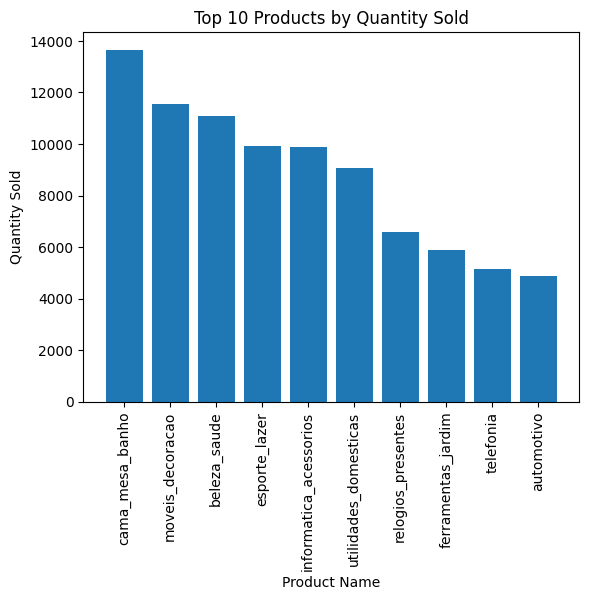

In [226]:
# plot top 10 produk berdasarkan jumlah yang terjual

plt.bar(produk_terlaris['product_category_name'][:10], produk_terlaris['order_item_id'][:10])
plt.xticks(rotation=90)
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.title('Top 10 Products by Quantity Sold')
plt.show()

Berdasarkan visualisasi data di atas memperlihatkan bahwa produk yang sering dibeli oleh customer adalah cama mesa banho disusul oleh moveis decoracao dan beleza saude. Dari sini kita mengetahui produk terlaris yang dibutuhkan oleh pelanggan itu apa.

### Pertanyaan 2:

2. Dari sekian banyaknya pesanan pastinya metode pembayaran antara satu sama lain berbeda, bagaimana pengaruh metode pembayaran terhadap jumlah pesanan?

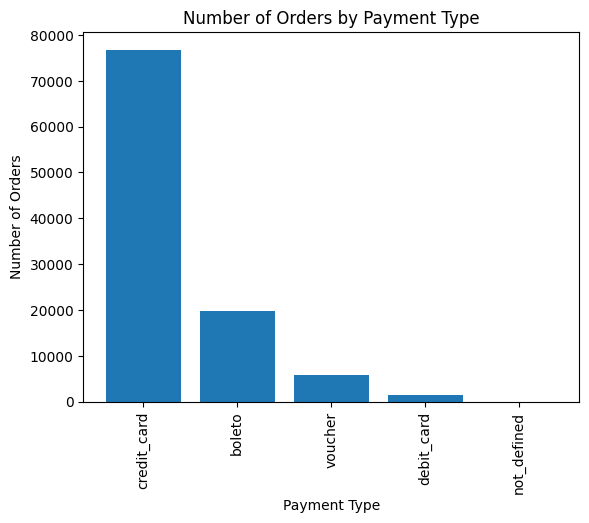

In [227]:
# membuat plot jumlah pesanan berdasarkan jenis pembayaran

plt.bar(pembayaran_produk['payment_type'], pembayaran_produk['order_id'])
plt.xticks(rotation=90)
plt.xlabel('Payment Type')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by Payment Type')
plt.show()

Berdasarkan data yang ditampilkan, banyak pengguna yang menggunakan credit card untuk melakukan proses transaksi pembayaran disusul oleh boleto, vouocher, debit card. Gap diantara posisi 1 dan ke 2 menunjukkan selisih yang cukup tinggi yaitu sekitar 70 ribu customer menggunakan kartu kredit.

### Pertanyaan 3:

3. Banyak lokasi pasar yang menjadi target dari penjualan setiap tahunnya, lalu bagaimana pengaruh lokasi pasar terhadap jumlah pesanan?

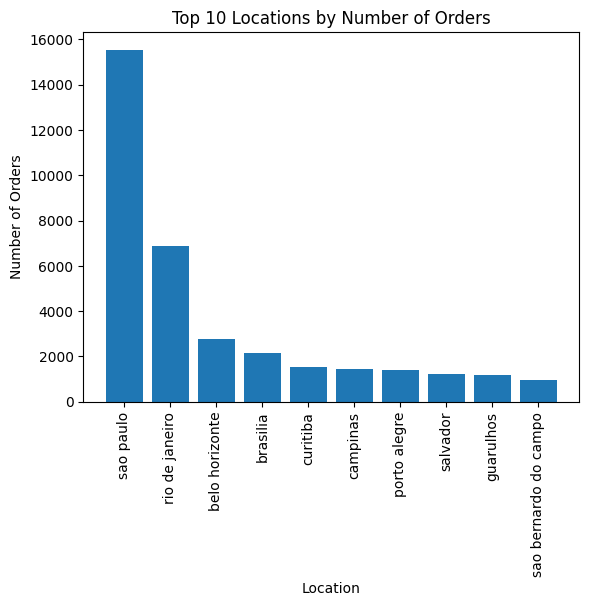

In [228]:
# plot lokasi top 10

plt.bar(lokasi_penjualan['customer_city'][:10], lokasi_penjualan['customer_id'][:10])
plt.xticks(rotation=90)
plt.xlabel('Location')
plt.ylabel('Number of Orders')
plt.title('Top 10 Locations by Number of Orders')
plt.show()

Sao Paulo merupakan kota di Brazil yang menjadi pusat kota terbesar yang menghasilkan customer dengan pembelian tertinggi di antara kota lainnya. Gap antara kota Sao Paulo dan Rio de Janeiro pun tergolong jauh jika dibandingkan dengan kota Rio de Janeiro dan Belo Horizonate. Gap menunjukkan sekita 6 ribu jumlah pesanan yang dilakukan.

## Conclusion

- Conclution pertanyaan 1
> Berdasarkan data yang divisualisasikan, produk terlaris di pasar e-commerce Brazil selama tahun 2016-2018 adalah sebagai berikut:
> 1. cama mesa baho
> 2. moveis decoracao
> 3. beleza saude
> 4. esporte lazer
> 5. informatica accesorios

- Conclution pertanyaan 2
> Berdasarkan visualisasi data pembayaran yang berbeda dapat mempengaruhi jumlah pesanan. Dari ke-4 metode pembayaran yang diberikan pelanggan atau customer sering menggunakan credit card untuk metode pembayaran dalam pembelian barang.

- Conclution pertanyaan 3
> Berdasarkan visualisasi data yang ditunjukkan, lokasi pasar juga mempengaruhi nilai jual dari barang, seperti yang ditunjukkan kota Sao Paulo. Sao Paulo adalah kota pertama dengan jarak atau gap jauh dari kota lainnya yang melakukan transaksi barang. Mungkin dapat menjadikan pertimbangan seller agar semakin lihai dalam menentukan lokasi pasar perdagangan juga gencar melakukan penyebaran broadcasting sebagai upaya pendongkrakan penjualan barang di setiap kota.

### RFM Analysis

Selain 3 pertanyaan di atas kita akan menghitung RFM atau analisis lanjutan dari data ini. Sederhananya, RFM analysis merupakan salah satu metode yang umum digunakan untuk melakukan segmentasi pelanggan (mengelompokkan pelanggan ke dalam beberapa kategori) berdasarkan tiga parameter, yaitu recency, frequency, dan monetary

In [229]:
all_df = pd.merge(
    left=df_order_item,
    right=df_order,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menggabungkan df_produk
all_df = pd.merge(
    left=all_df,
    right=df_produk,
    how="left",
    left_on="product_id",
    right_on="product_id"
)

# Menggabungkan df_order_metode_bayar
all_df = pd.merge(
    left=all_df,
    right=df_order_metode_bayar,
    how="left",
    left_on="order_id",
    right_on="order_id"
)

# Menggabungkan df_customer
all_df = pd.merge(
    left=all_df,
    right=df_customer,
    how="left",
    left_on="customer_id",
    right_on="customer_id"
)

print(all_df.head())


                           order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

  shipping_limit_date   price  freight_value  \
0 2017-09-19 09:45:35   58.90          13.29   
1 2017-05-03 11:05:13  239.90          19.93   
2 2018-01-18 14:48:30  199.00          17.87   
3 2018-08-15 10:10:18   12.99          12.79

In [230]:
print(all_df.columns)

Index(['order_id', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'customer_id',
       'order_status', 'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'product_category_name',
       'product_name_lenght', 'product_description_lenght',
       'product_photos_qty', 'product_weight_g', 'product_length_cm',
       'product_height_cm', 'product_width_cm', 'payment_sequential',
       'payment_type', 'payment_installments', 'payment_value',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state'],
      dtype='object')


In [231]:
rfm_df = all_df.groupby(by="customer_id", as_index=False).agg({
    "order_purchase_timestamp": "max", # mengambil tanggal order terakhir
    "order_id": "nunique", # menghitung jumlah order
    "price": "sum" # menghitung jumlah revenue yang dihasilkan
})
rfm_df.columns = ["customer_id", "max_order_timestamp", "frequency", "monetary"]

# menghitung kapan terakhir pelanggan melakukan transaksi (hari)
rfm_df["max_order_timestamp"] = rfm_df["max_order_timestamp"].dt.date
recent_date = df_order["order_purchase_timestamp"].dt.date.max()
rfm_df["recency"] = rfm_df["max_order_timestamp"].apply(lambda x: (recent_date - x).days)

rfm_df.drop("max_order_timestamp", axis=1, inplace=True)
rfm_df.head()


,customer_id,frequency,monetary,recency
0,00012a2ce6f8dcda20d059ce98491703,1,89.80,337
1,000161a058600d5901f007fab4c27140,1,54.90,458
2,0001fd6190edaaf884bcaf3d49edf079,1,179.99,596
3,0002414f95344307404f0ace7a26f1d5,1,149.90,427
4,000379cdec625522490c315e70c7a9fb,1,93.00,198


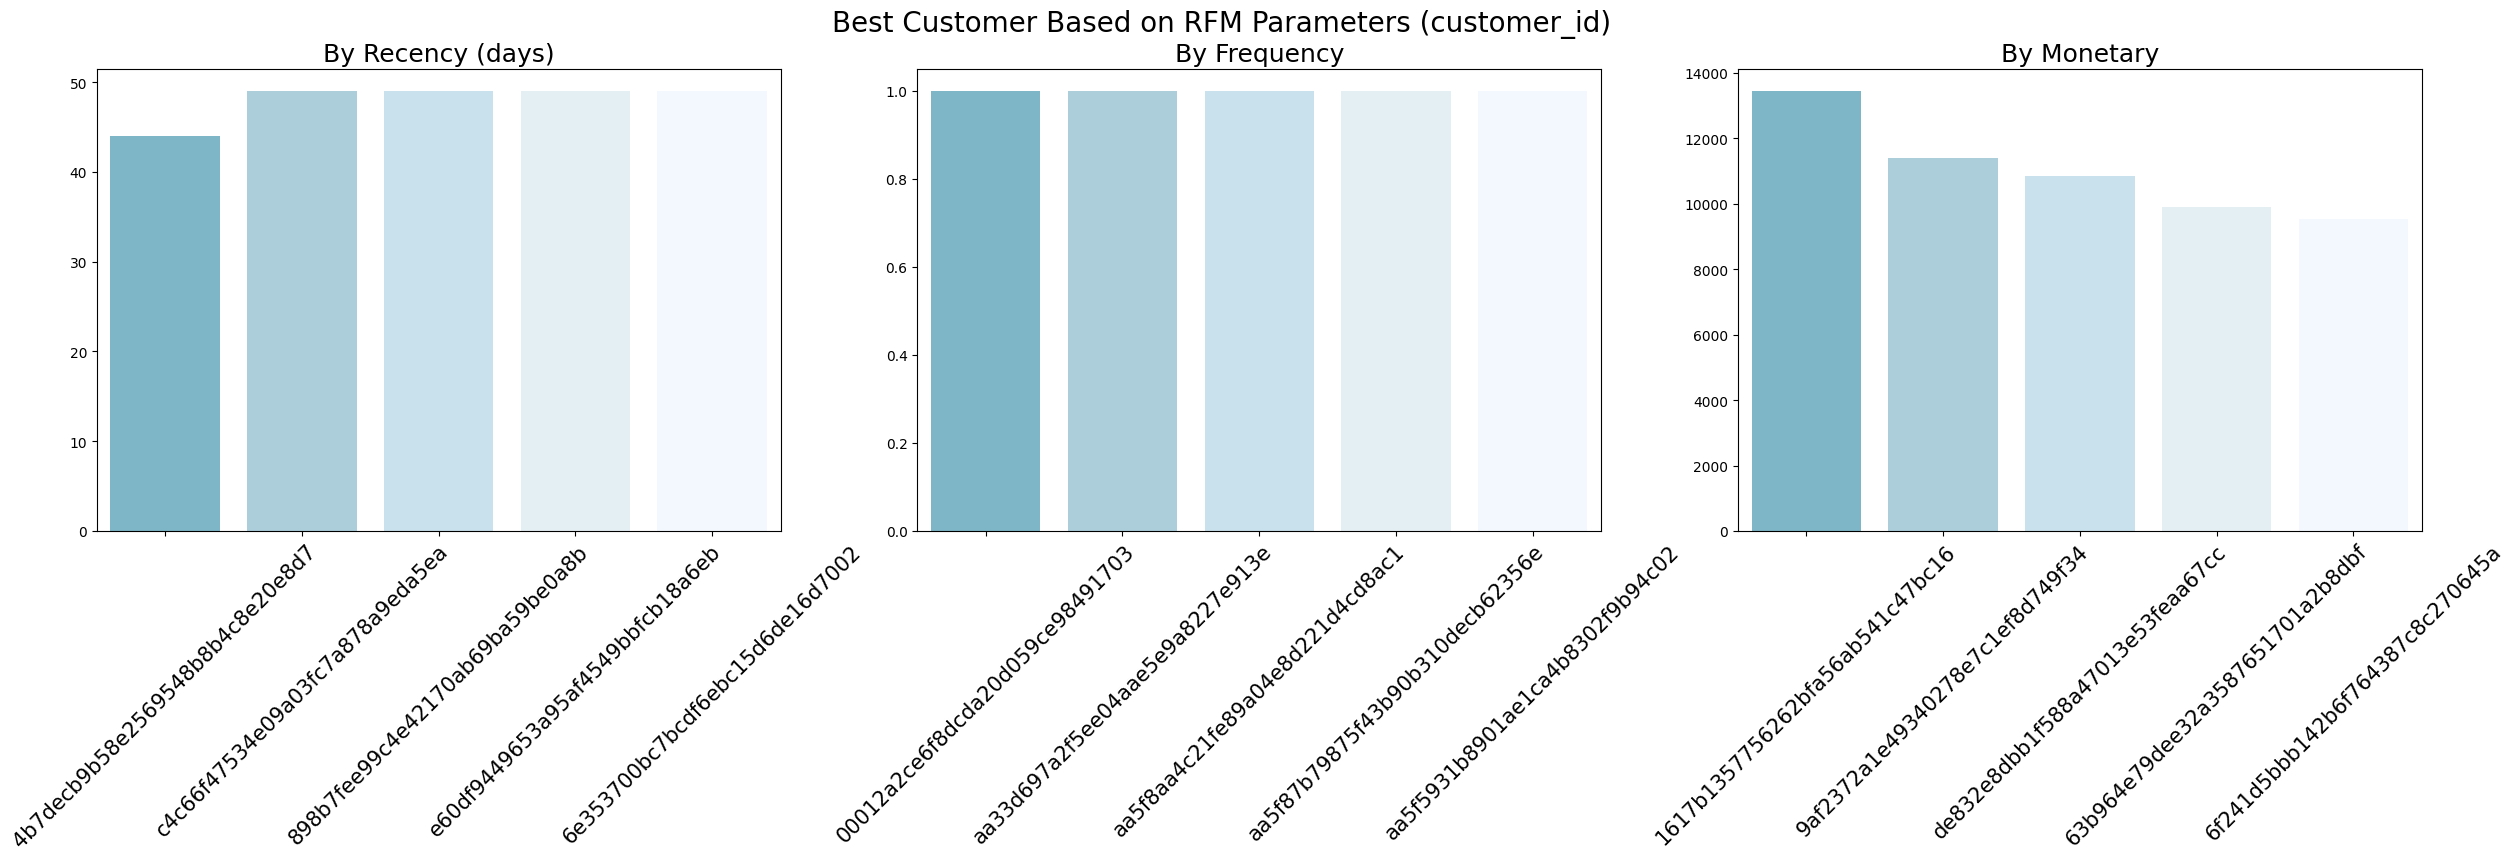

In [232]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))

colors = ["#72BCD4", "#A3D2E2", "#C3E3F2", "#E1F0F7", "#F0F8FF"]  # Ganti dengan warna yang berbeda

# Recency
sns.barplot(y="recency", x="customer_id", data=rfm_df.sort_values(by="recency", ascending=True).head(5), palette=colors, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel('')
ax[0].set_title("By Recency (days)", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15, labelrotation=45)  # Menambahkan rotasi pada label sumbu x

# Frequency
sns.barplot(y="frequency", x="customer_id", data=rfm_df.sort_values(by="frequency", ascending=False).head(5), palette=colors, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel('')
ax[1].set_title("By Frequency", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15, labelrotation=45)  # Menambahkan rotasi pada label sumbu x

# Monetary
sns.barplot(y="monetary", x="customer_id", data=rfm_df.sort_values(by="monetary", ascending=False).head(5), palette=colors, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel('')
ax[2].set_title("By Monetary", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15, labelrotation=45)  # Menambahkan rotasi pada label sumbu x

plt.suptitle("Best Customer Based on RFM Parameters (customer_id)", fontsize=20)
plt.show()


In [233]:
all_df.to_csv("all_data.csv", index=False)